# Binaries analysis - BS90

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib widget

In [2]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/catalog.xym'
data = pd.read_csv(input_file, sep='\t')

mag_limit = -5. 
data_spatial = data[(data['F814W'] < mag_limit) & (data['F555W'] < mag_limit)]

In [3]:
# Plot the spatial distribution and the selected old cluster (B 90) and young one (NGC 346)

# center and approximative radius of the old cluster
center_BS90 = np.array([5000, 7000])
radius_BS90 = 1000

# center and approximative radius of the reference field
center_reference = np.array([3000, 3000])
radius_reference = 1000

# compute the distance and select the stars in the two clusters
data['distance_BS90'] = np.sqrt((data['x'] - center_BS90[0]) ** 2 + (data['y'] - center_BS90[1]) ** 2)
data['distance_reference'] = np.sqrt((data['x'] - center_reference[0]) ** 2 + (data['y'] - center_reference[1]) ** 2)

data_BS90_cluster = data[data['distance_BS90'] < radius_BS90]
data_reference_field = data[data['distance_reference'] < radius_reference]

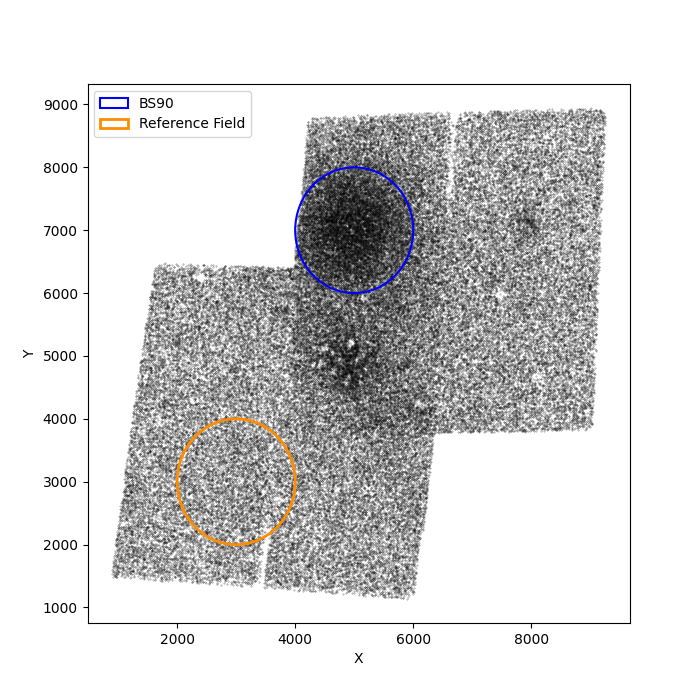

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_spatial['x'], data_spatial['y'], s=0.1, alpha=0.5, c='black') #c=data_spatial['F814W'], cmap = 'magma_r')
circle_BS90 = plt.Circle(center_BS90, radius_BS90, color='blue', fill=False, linestyle='-', linewidth=1.5, label=r'BS90')
ax.add_patch(circle_BS90)
circle_reference = plt.Circle(center_reference, radius_reference, color='darkorange', fill=False, linestyle='-', linewidth=2, label=r'Reference Field')
ax.add_patch(circle_reference)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Load the data for the test stars, set the colormap.

In [5]:
import sys
import os

# set path to tools folder
module_path = '/Users/giadaaggio/Desktop/Thesis/TOTORO/CODES/tools'
sys.path.append(module_path)

from binaries_utils import BinaryStarUtils
binary = BinaryStarUtils()

colormap = plt.cm.jet

In [7]:
test_stars_MS = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/test_stars_MS_B90.csv', delim_whitespace=True)
test_stars_HB = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/test_stars_HB_B90.csv', delim_whitespace=True)

test_stars = pd.concat([test_stars_MS, test_stars_HB], ignore_index=True)

# drop the stars with a F275W higher than -5
test_stars_uv = test_stars[test_stars['F275W'] < -5]

test_stars['index'] = test_stars.index
color_test = binary.color_index_noncalibrated(test_stars, 'index', colormap, non_calibrated=True)

test_stars_uv['index'] = test_stars_uv.index
color_test_uv = binary.color_index_noncalibrated(test_stars_uv, 'index', colormap, non_calibrated=True)

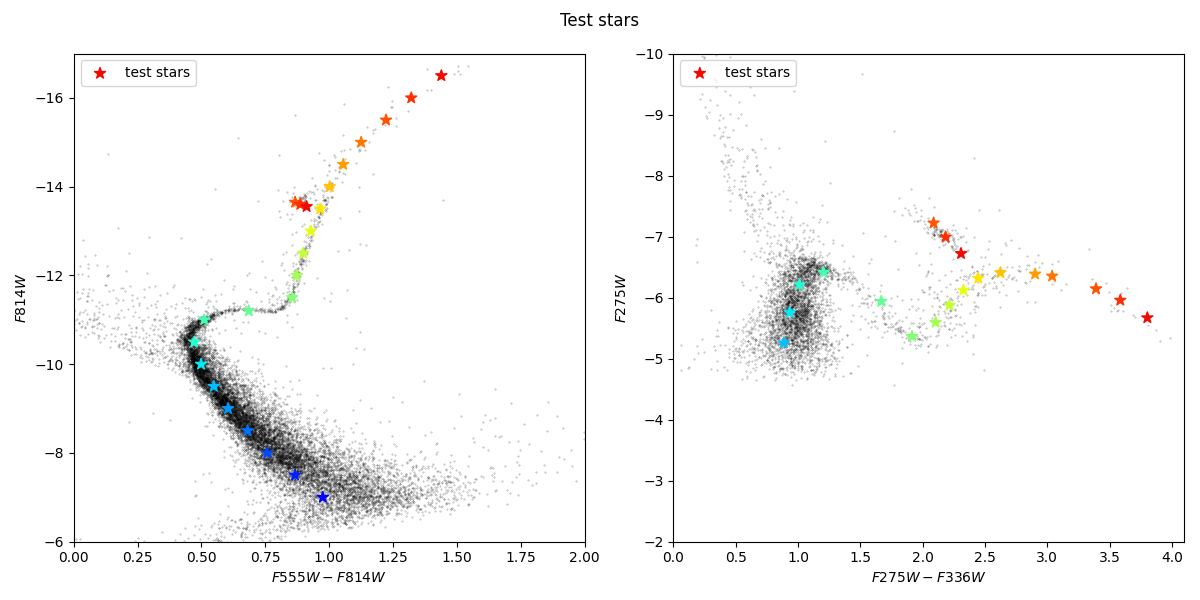

In [8]:
plt.figure(figsize=(12, 6))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.1, c='black', alpha=0.4, zorder=1)
plt.scatter(test_stars['F555W']-test_stars['F814W'], test_stars['F814W'], s=70, c=color_test, label='test stars', marker='*', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.1, c='black', alpha=0.4, zorder=1)
plt.scatter(test_stars_uv['F275W']-test_stars_uv['F336W'], test_stars_uv['F275W'], s=70, c=color_test_uv, label='test stars', marker='*', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-2,-10)

plt.xlabel(r'$F275W-F336W$')
plt.ylabel(r'$F275W$')
plt.legend(loc='upper left')

plt.suptitle('Test stars')
plt.tight_layout()
plt.show()

In [9]:
# select the HB stars
hb_stars_index = test_stars.index[test_stars['source'] == 'HB_test_stars'].tolist()
hb_stars = test_stars.iloc[hb_stars_index]
print()

# binaries in visible
binaries_vis_HB = binary.binary_system_HB(test_stars, hb_stars_index, 'F555W', 'F814W')

# Update the 'source' column for binaries where the secondary is an HB star
binaries_vis_HB.loc[binaries_vis_HB['secondary'].isin(hb_stars_index), 'source'] = 'HB_test_stars'

color_vis = binary.color_index_noncalibrated(binaries_vis_HB, 'secondary', colormap, non_calibrated=True)

# binaries in UV
binaries_UV_HB = binary.binary_system_HB(test_stars_uv, hb_stars_index, 'F275W', 'F336W')

binaries_UV_HB.loc[binaries_UV_HB['secondary'].isin(hb_stars_index), 'source'] = 'HB_test_stars'

color_UV = binary.color_index_noncalibrated(binaries_UV_HB, 'secondary', colormap, non_calibrated=True)

#binaries_vis_HB.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/BS_HB_vis.csv', index=False, float_format='%.4f', sep=' ')
#binaries_UV_HB.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/BS_HB_uv.csv', index=False, float_format='%.4f', sep=' ')

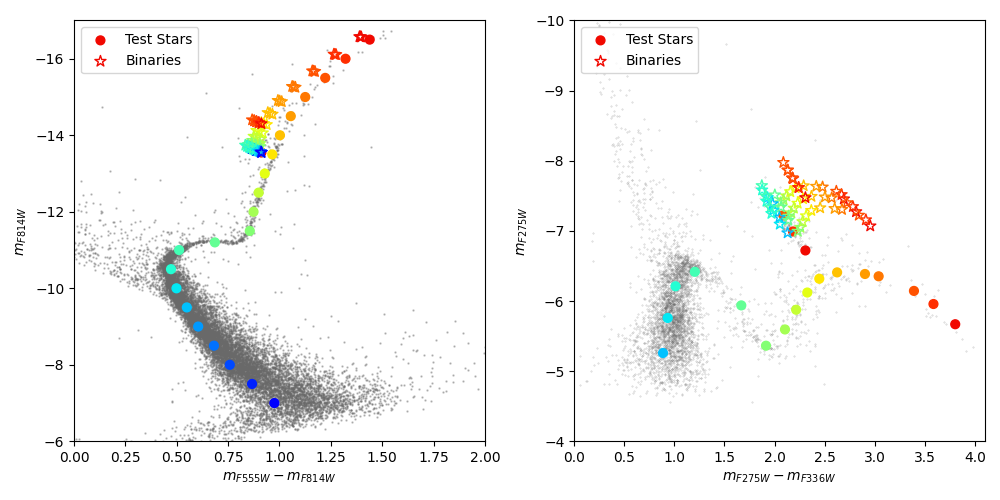

In [10]:
plt.figure(figsize=(10, 5))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.5, c='dimgray', alpha=0.4, zorder=1)
plt.scatter(test_stars['F555W']-test_stars['F814W'], test_stars['F814W'], s=40, c=color_test, label='Test Stars', marker='o', zorder=2)
plt.scatter(binaries_vis_HB['F555W']-binaries_vis_HB['F814W'], binaries_vis_HB['F814W'], s=70, edgecolor=color_vis, facecolors='none', label='Binaries', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$m_{F555W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.1, c='dimgray', alpha=0.4, zorder=1)
plt.scatter(test_stars_uv['F275W']-test_stars_uv['F336W'], test_stars_uv['F275W'], s=40, c=color_test_uv, label='Test Stars', marker='o', zorder=2)
plt.scatter(binaries_UV_HB['F275W']-binaries_UV_HB['F336W'], binaries_UV_HB['F275W'], s=70, edgecolors=color_UV, facecolors='none', label='Binaries', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-4,-10)

plt.xlabel(r'$m_{F275W}-m_{F336W}$')
plt.ylabel(r'$m_{F275W}$')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [11]:
test_rgb_prim = test_stars[(test_stars['F814W'] < -11.49) & (test_stars['F814W'] > -13.49)]
primary_indices_rgb = test_rgb_prim.index.tolist()

# binaries in visible
binaries_vis_RGB = binary.binary_system_general(test_stars, primary_indices_rgb, 'F555W', 'F814W')
binaries_vis_RGB.loc[binaries_vis_RGB['secondary'].isin(hb_stars_index), 'source'] = 'HB_test_stars'
color_vis_RGB = binary.color_index_noncalibrated(binaries_vis_RGB, 'secondary', colormap, non_calibrated=True)

print(primary_indices_rgb)

[7, 8, 9, 10]


In [12]:
# select only one star for the plot
binaries_vis_RGB = binaries_vis_RGB[binaries_vis_RGB['primary'] == 10]

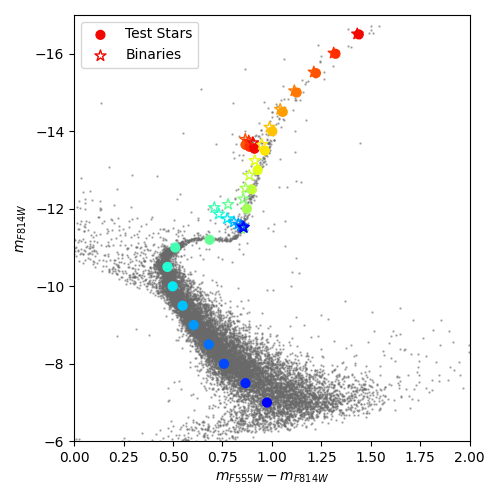

In [13]:
plt.figure(figsize=(5, 5))

plt.scatter(data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.5, c='dimgray', alpha=0.5, zorder=1)
plt.scatter(test_stars['F555W']-test_stars['F814W'], test_stars['F814W'], s=30, c=color_test, label='Test Stars', marker='o', zorder=2)
plt.scatter(binaries_vis_RGB['F555W']-binaries_vis_RGB['F814W'], binaries_vis_RGB['F814W'], s=70, edgecolor=color_vis_RGB, facecolors='none', label='Binaries', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$m_{F555W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Quantitative analysis of binaries (HB)

In [14]:
# Do you need to select the stars?
region_selection = False

<div class= 'alert alert-block alert-info'>
Use <b><tt>region_selection = True</b></tt> if you need to re-select the regions for computing the binary fraction, otherwise leave it to <b><tt>False</b></tt>
</div>

In [15]:
bound_bin_vis_high = binaries_vis_HB[(binaries_vis_HB['primary'] == 23) & (binaries_vis_HB['secondary'] == 6)]
bound_bin_vis_low = binaries_vis_HB[(binaries_vis_HB['primary'] == 23) & (binaries_vis_HB['secondary'] == 11)]
bound_bin_uv_high = binaries_UV_HB[(binaries_UV_HB['primary'] == 23) & (binaries_UV_HB['secondary'] == 6)]
bound_bin_uv_low = binaries_UV_HB[(binaries_UV_HB['primary'] == 23) & (binaries_UV_HB['secondary'] == 11)]

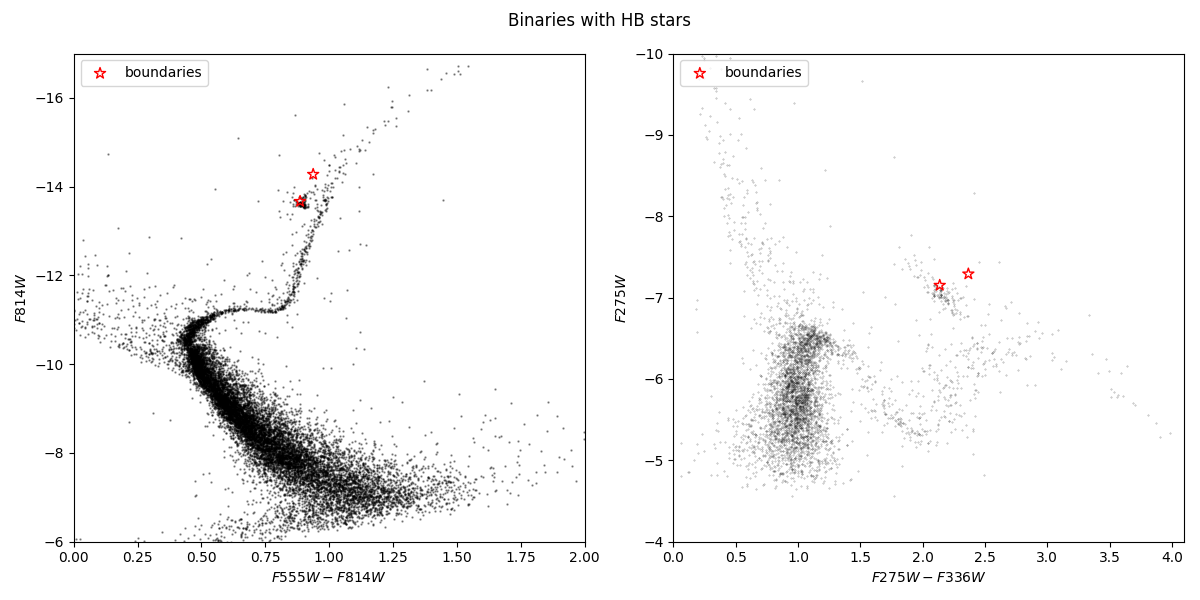

In [16]:
plt.figure(figsize=(12, 6))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.5, c='black', alpha=0.4, zorder=1)
plt.scatter(bound_bin_vis_high['F555W']-bound_bin_vis_high['F814W'], bound_bin_vis_high['F814W'], s=70, edgecolor='red', facecolors='none', label='boundaries', marker='*', zorder=3)
plt.scatter(bound_bin_vis_low['F555W']-bound_bin_vis_low['F814W'], bound_bin_vis_low['F814W'], s=70, edgecolor='red', facecolors='none', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.1, c='black', alpha=0.4, zorder=1)
plt.scatter(bound_bin_uv_high['F275W']-bound_bin_uv_high['F336W'], bound_bin_uv_high['F275W'], s=70, edgecolors='red', facecolors='none', label='boundaries', marker='*', zorder=3)
plt.scatter(bound_bin_uv_low['F275W']-bound_bin_uv_low['F336W'], bound_bin_uv_low['F275W'], s=70, edgecolors='red', facecolors='none', marker='*', zorder=3)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-4,-10)

plt.xlabel(r'$F275W-F336W$')
plt.ylabel(r'$F275W$')
plt.legend(loc='upper left')

plt.suptitle('Binaries with HB stars')
plt.tight_layout()
plt.show()

In [17]:
from CMDAnalyzer import CMDRegionSelector

### Optical CMD

In [18]:
if region_selection is True:
    cmd_select_vis = CMDRegionSelector(
        data = data_BS90_cluster,
        color = data_BS90_cluster['F555W'] - data_BS90_cluster['F814W'],
        magnitude = data_BS90_cluster['F814W'],
        color_bound_bin_high = bound_bin_vis_high['F555W'] - bound_bin_vis_high['F814W'],
        magnitude_bound_bin_high = bound_bin_vis_high['F814W'],
        color_bound_bin_low = bound_bin_vis_low['F555W'] - bound_bin_vis_low['F814W'],
        magnitude_bound_bin_low = bound_bin_vis_low['F814W'],
        x_label='F555W-F814W',
        y_label='F814W',
        output_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv'
    )

In [19]:
region_vis = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv')

region_vis_A = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], 
    magnitude = data_BS90_cluster['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv')

region_vis_B = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], 
    magnitude = data_BS90_cluster['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv')

# compute the error on the binary fraction
error_vis_A = np.sqrt(len(region_vis_A) - 1)
error_vis_B = np.sqrt(len(region_vis_B) - 1)

print('Region A: ', len(region_vis_A), '+/-', error_vis_A)
print('Region B: ', len(region_vis_B), '+/-', error_vis_B)

frac_HB_bin_vis = len(region_vis_B) / (len(region_vis_A) + len(region_vis_B))
err_HB_bin_vis = (np.sqrt(len(region_vis_B)**2 * error_vis_A**2 + len(region_vis_A)**2 * error_vis_B**2)) / ((len(region_vis_A) + len(region_vis_B))**2)

print('Binary fraction: ', frac_HB_bin_vis, '+/-', err_HB_bin_vis)

Region A:  116 +/- 10.723805294763608
Region B:  10 +/- 3.0
Binary fraction:  0.07936507936507936 +/- 0.022937032088032657


In [20]:
region_names = {
    0: 'Region A',
    1: 'Region B',
}

region_colors = {
    0: 'red',
    1: 'blue',
}

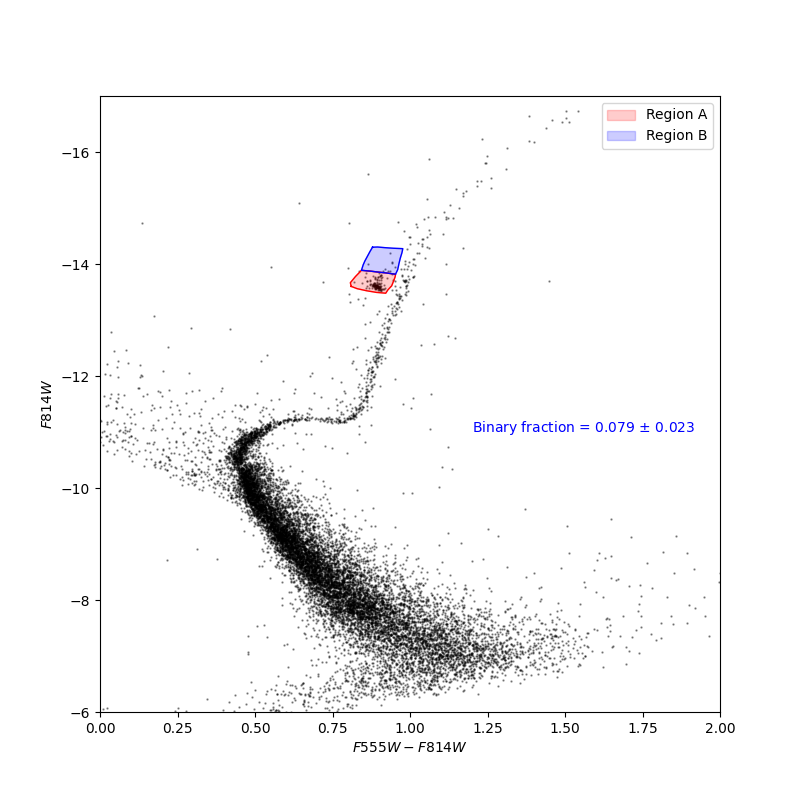

In [21]:
# Plot the CMD
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(data_BS90_cluster['F555W'] - data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.5, c='black', alpha=0.4, zorder=1)
ax.invert_yaxis()
plt.xlim(0,2)
plt.ylim(-6,-17)
ax.set_xlabel(r'$F555W-F814W$')
ax.set_ylabel(r'$F814W$')

# Group by Region_ID and plot each region
for region_id, region in region_vis.groupby("Region_ID"):
    # Append the first point to close the polygon
    closed_region = pd.concat([region, region.iloc[[0]]])
    region_label = region_names.get(region_id, f"Region {region_id}")  # Default to "Region X"

    # Fill the inside of the region
    ax.fill(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), alpha=0.2, label=region_label, zorder=2)

    # Plot the region outline
    ax.plot(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), linewidth=1, zorder=3)

# Add text to the plot using the value of the variable
ax.text(1.2, -11, f'Binary fraction = {frac_HB_bin_vis:.3f} $\pm$ {err_HB_bin_vis:.3f}', fontsize=10, color='blue')

ax.legend()
plt.show()

### UV CMD

In [22]:
if region_selection is True:
    cmd_select_vis = CMDRegionSelector(
        data = data_BS90_cluster,
        color = data_BS90_cluster['F275W'] - data_BS90_cluster['F336W'],
        magnitude = data_BS90_cluster['F275W'],
        color_bound_bin_high = bound_bin_uv_high['F275W'] - bound_bin_uv_high['F336W'],
        magnitude_bound_bin_high = bound_bin_uv_high['F275W'],
        color_bound_bin_low = bound_bin_uv_low['F275W'] - bound_bin_uv_low['F336W'],
        magnitude_bound_bin_low = bound_bin_uv_low['F275W'],
        x_label='F275W-F336W',
        y_label='F275W',
        output_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv'
    )

In [23]:
region_uv = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv')

region_uv_A = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], 
    magnitude = data_BS90_cluster['F275W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv')

region_uv_B = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], 
    magnitude = data_BS90_cluster['F275W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv')

# compute the error on the binary fraction
error_uv_A = np.sqrt(len(region_uv_A) - 1)
error_uv_B = np.sqrt(len(region_uv_B) - 1)

print('Region A: ', len(region_uv_A), '+/-', error_uv_A)
print('Region B: ', len(region_uv_B), '+/-', error_uv_B)

frac_HB_bin_uv = len(region_uv_B) / (len(region_uv_A) + len(region_uv_B))
err_HB_bin_uv = (np.sqrt(len(region_uv_B)**2 * error_uv_A**2 + len(region_uv_A)**2 * error_uv_B**2)) / ((len(region_uv_A) + len(region_uv_B))**2)

print('Binary fraction: ', frac_HB_bin_uv, '+/-', err_HB_bin_uv)

Region A:  110 +/- 10.44030650891055
Region B:  13 +/- 3.4641016151377544
Binary fraction:  0.10569105691056911 +/- 0.026736792059580603


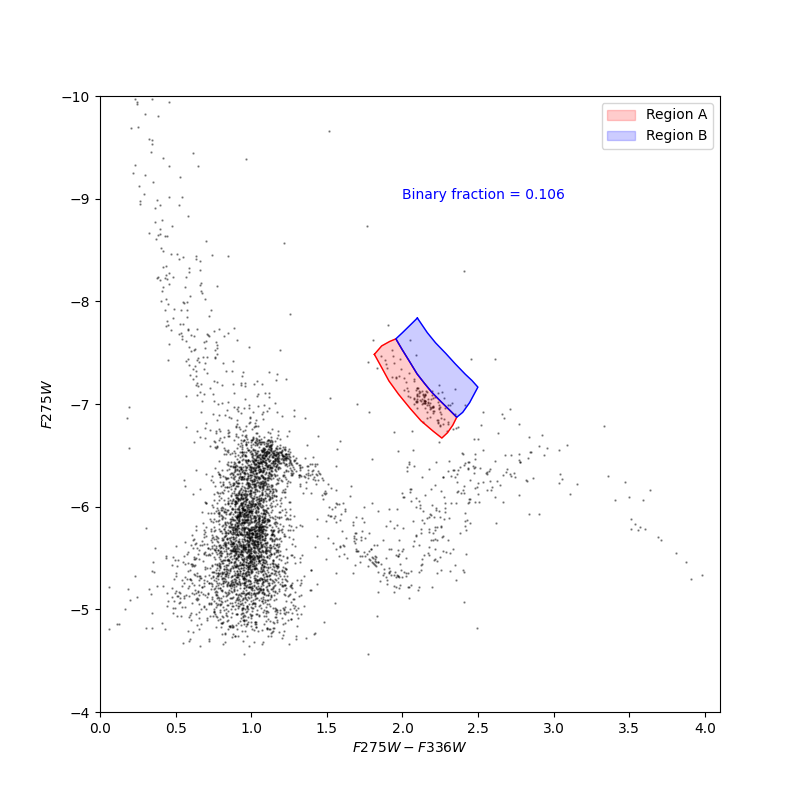

In [24]:
# Plot the CMD
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(data_BS90_cluster['F275W'] - data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.5, c='black', alpha=0.4, zorder=1)
ax.invert_yaxis()
plt.xlim(0,4.1)
plt.ylim(-4,-10)
ax.set_xlabel(r'$F275W-F336W$')
ax.set_ylabel(r'$F275W$')

# Group by Region_ID and plot each region
for region_id, region in region_uv.groupby("Region_ID"):
    # Append the first point to close the polygon
    closed_region = pd.concat([region, region.iloc[[0]]])
    region_label = region_names.get(region_id, f"Region {region_id}")  # Default to "Region X"

    # Fill the inside of the region
    ax.fill(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), alpha=0.2, label=region_label, zorder=2)

    # Plot the region outline
    ax.plot(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), linewidth=1, zorder=3)

# Add text to the plot using the value of the variable
ax.text(2, -9, f'Binary fraction = {frac_HB_bin_uv:.3f}', fontsize=10, color='blue')

ax.legend()
plt.show()

### Clean up from AGB stars
Select the AGB stars

In [25]:
if region_selection is True:
    agb_region_selection = CMDRegionSelector(
        data = data_BS90_cluster,
        color = data_BS90_cluster['F275W'] - data_BS90_cluster['F814W'],
        magnitude = data_BS90_cluster['F336W'],
        x_label='F275W-F814W',
        y_label='F336W',
        output_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/agb_F275W_F336W.csv'
    )

In [26]:
agb_region = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/agb_F275W_F336W.csv'
agb_stars = CMDRegionSelector.get_stars_inside_region(0, data_BS90_cluster, data_BS90_cluster['F275W']-data_BS90_cluster['F814W'], data_BS90_cluster['F336W'], agb_region)

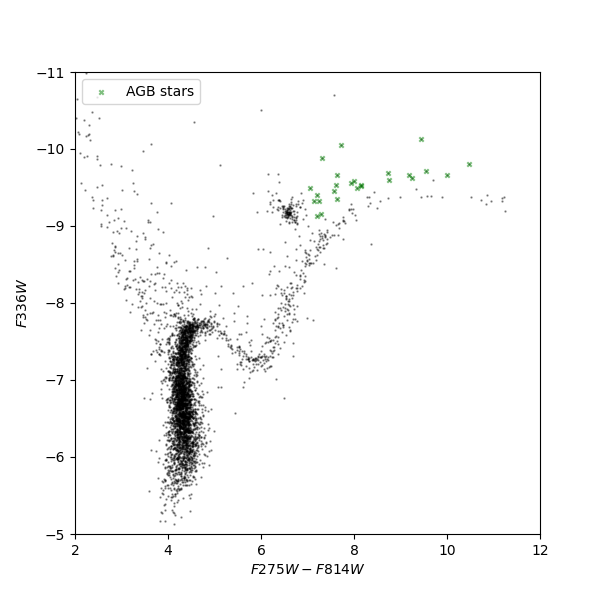

In [27]:
# CMD used to select agb stars
plt.figure(figsize=(6,6))

plt.scatter(data_BS90_cluster['F275W'] - data_BS90_cluster['F814W'], data_BS90_cluster['F336W'], s=0.5, c='black', alpha=0.4, zorder=1)
plt.scatter(agb_stars['F275W'] - agb_stars['F814W'], agb_stars['F336W'], s=10, c='green', alpha=0.5, zorder=2, marker='x', label='AGB stars')
plt.gca().invert_yaxis()
plt.xlim(2, 12)
plt.ylim(-5, -11)
plt.xlabel(r'$F275W-F814W$')
plt.ylabel(r'$F336W$')
plt.legend(loc='upper left')

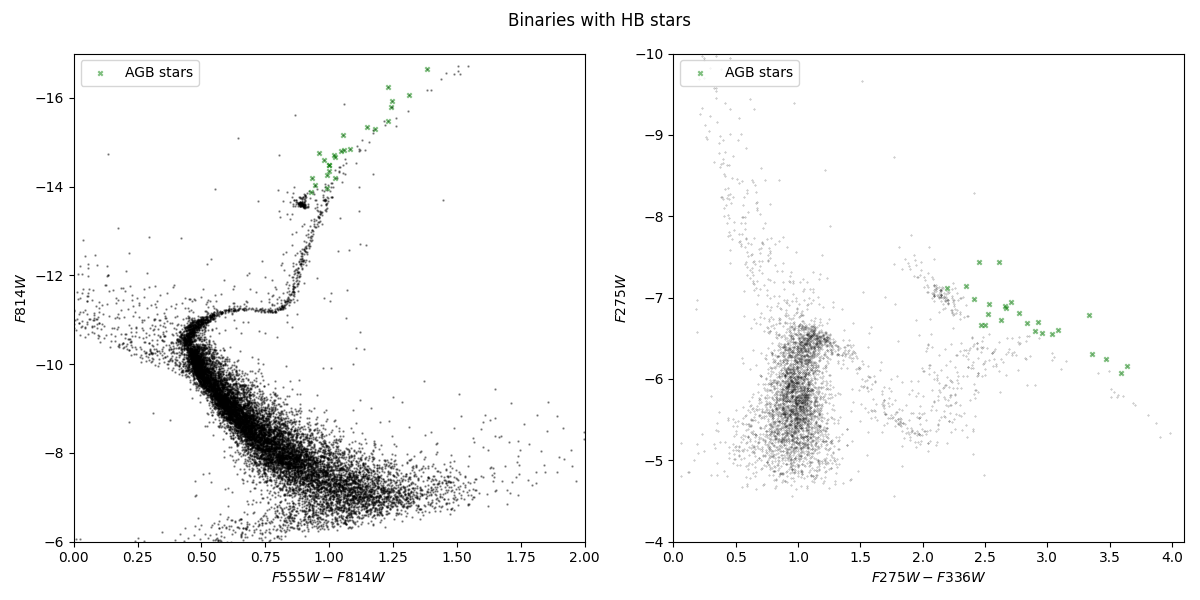

In [28]:
plt.figure(figsize=(12, 6))

# plot optical filters
plt.subplot(1, 2, 1)

plt.scatter(data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.5, c='black', alpha=0.4, zorder=1)
plt.scatter(agb_stars['F555W']-agb_stars['F814W'], agb_stars['F814W'], s=10, alpha=0.5, c='green', label='AGB stars', marker='x', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,2)
plt.ylim(-6,-17)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend(loc='upper left')

# plot UV filters
plt.subplot(1, 2, 2)

plt.scatter(data_BS90_cluster['F275W']-data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.1, c='black', alpha=0.4, zorder=1)
plt.scatter(agb_stars['F275W']-agb_stars['F336W'], agb_stars['F275W'], s=10, alpha=0.5, c='green', label='AGB stars', marker='x', zorder=2)
plt.gca().invert_yaxis()

plt.xlim(0,4.1)
plt.ylim(-4,-10)

plt.xlabel(r'$F275W-F336W$')
plt.ylabel(r'$F275W$')
plt.legend(loc='upper left')

plt.suptitle('Binaries with HB stars')
plt.tight_layout()
plt.show()

In [29]:
# recompute the binary fraction in the selected regions without counting the AGB stars
region_vis_B_noagb = region_vis_B[~region_vis_B.index.isin(agb_stars.index)]
error_vis_B_noagb = np.sqrt(len(region_vis_B_noagb) - 1)

frac_HB_bin_vis_noagb = len(region_vis_B_noagb) / (len(region_vis_A) + len(region_vis_B_noagb))
print('Binary fraction (no AGB)')
print('Visible:', frac_HB_bin_vis_noagb)

region_uv_B_noagb = region_uv_B[~region_uv_B.index.isin(agb_stars.index)]
error_uv_B_noagb = np.sqrt(len(region_uv_B_noagb) - 1)

frac_HB_bin_uv_noagb = len(region_uv_B_noagb) / (len(region_uv_A) + len(region_uv_B_noagb))
print('UV:', frac_HB_bin_uv_noagb)

Binary fraction (no AGB)
Visible: 0.056910569105691054
UV: 0.08333333333333333


### Clean up from stars in the field

In [30]:
region_vis_A_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_reference_field, 
    color = data_reference_field['F555W']-data_reference_field['F814W'], 
    magnitude = data_reference_field['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv')

region_vis_B_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_reference_field, 
    color = data_reference_field['F555W']-data_reference_field['F814W'], 
    magnitude = data_reference_field['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F555W_F814W.csv')

err_visA_field = np.sqrt(len(region_vis_A_field) - 1)
err_visB_field = np.sqrt(len(region_vis_B_field) - 1)

print('Region A: ', len(region_vis_A_field), '+/-', err_visA_field)
print('Region B: ', len(region_vis_B_field), '+/-', err_visB_field)

Region A:  13 +/- 3.4641016151377544
Region B:  2 +/- 1.0


In [31]:
region_uv_A_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_reference_field, 
    color = data_reference_field['F275W']-data_reference_field['F336W'], 
    magnitude = data_reference_field['F275W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv')

region_uv_B_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_reference_field, 
    color = data_reference_field['F275W']-data_reference_field['F336W'], 
    magnitude = data_reference_field['F275W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_HB_F275W_F336W.csv')

err_uvA_field = np.sqrt(len(region_uv_A_field) - 1)
err_uvB_field = np.sqrt(len(region_uv_B_field) - 1)

print('Region A: ', len(region_uv_A_field), '+/-', err_uvA_field)
print('Region B: ', len(region_uv_B_field), '+/-', err_uvB_field)

Region A:  10 +/- 3.0
Region B:  5 +/- 2.0


In [32]:
frac_HB_bin_vis_clean = (len(region_vis_B_noagb) - len(region_vis_B_field)) / (len(region_vis_A) - len(region_vis_A_field) + len(region_vis_B_noagb)- len(region_vis_B_field))
print('Binary fraction (after cleaning from field stars) - vis:', frac_HB_bin_vis_clean)

frac_HB_bin_uv_clean = (len(region_uv_B_noagb) - len(region_uv_B_field)) / (len(region_uv_A) - len(region_uv_A_field) + len(region_uv_B_noagb)- len(region_uv_B_field))
print('Binary fraction (after cleaning from field stars) - uv:', frac_HB_bin_uv_clean)

Binary fraction (after cleaning from field stars) - vis: 0.046296296296296294
Binary fraction (after cleaning from field stars) - uv: 0.047619047619047616


In [33]:
# Define values and their uncertainties
N_A = len(region_vis_A)  # Number of stars in region A
N_A_field = len(region_vis_A_field)  # Number of field stars in region A
N_B_noagb = len(region_vis_B_noagb)  # Number of stars in region B (excluding AGB)
N_B_field = len(region_vis_B_field)  # Number of field stars in region B

# Define associated uncertainties (assuming Poisson errors)
dN_A = np.sqrt(N_A-1)
dN_A_field = np.sqrt(N_A_field-1)
dN_B_noagb = np.sqrt(N_B_noagb-1)
dN_B_field = np.sqrt(N_B_field-1)

# Compute A and B with their uncertainties
A = N_A - N_A_field
dA = np.sqrt(dN_A**2 + dN_A_field**2)  # Error propagation for A

B = N_B_noagb - N_B_field
dB = np.sqrt(dN_B_noagb**2 + dN_B_field**2)  # Error propagation for B

# Compute the fraction
frac_HB_bin_vis_clean = B / (A + B)

# Propagate the uncertainty
d_frac_HB_bin_vis_clean = np.sqrt((B**2 * dA**2 + A**2 * dB**2)) / (A + B)**2

# Print results
print(f"Fraction of binaries in visible: {frac_HB_bin_vis_clean:.4f} ± {d_frac_HB_bin_vis_clean:.4f}")

Fraction of binaries in visible: 0.0463 ± 0.0239


In [34]:
# Define values and their uncertainties
N_A = len(region_uv_A)  # Number of stars in region A
N_A_field = len(region_uv_A_field)  # Number of field stars in region A
N_B_noagb = len(region_uv_B_noagb)  # Number of stars in region B (excluding AGB)
N_B_field = len(region_uv_B_field)  # Number of field stars in region B

# Define associated uncertainties (assuming Poisson errors)
dN_A = np.sqrt(N_A)
dN_A_field = np.sqrt(N_A_field)
dN_B_noagb = np.sqrt(N_B_noagb)
dN_B_field = np.sqrt(N_B_field)

# Compute A and B with their uncertainties
A = N_A - N_A_field
dA = np.sqrt(dN_A**2 + dN_A_field**2)  # Error propagation for A

B = N_B_noagb - N_B_field
dB = np.sqrt(dN_B_noagb**2 + dN_B_field**2)  # Error propagation for B

# Compute the fraction
frac_HB_bin_uv_clean = B / (A + B)

# Propagate the uncertainty
d_frac_HB_bin_uv_clean = np.sqrt((B**2 * dA**2 + A**2 * dB**2)) / (A + B)**2

# Print results
print(f"Fraction: {frac_HB_bin_uv_clean:.4f} ± {d_frac_HB_bin_uv_clean:.4f}")

Fraction: 0.0476 ± 0.0355


## Final results

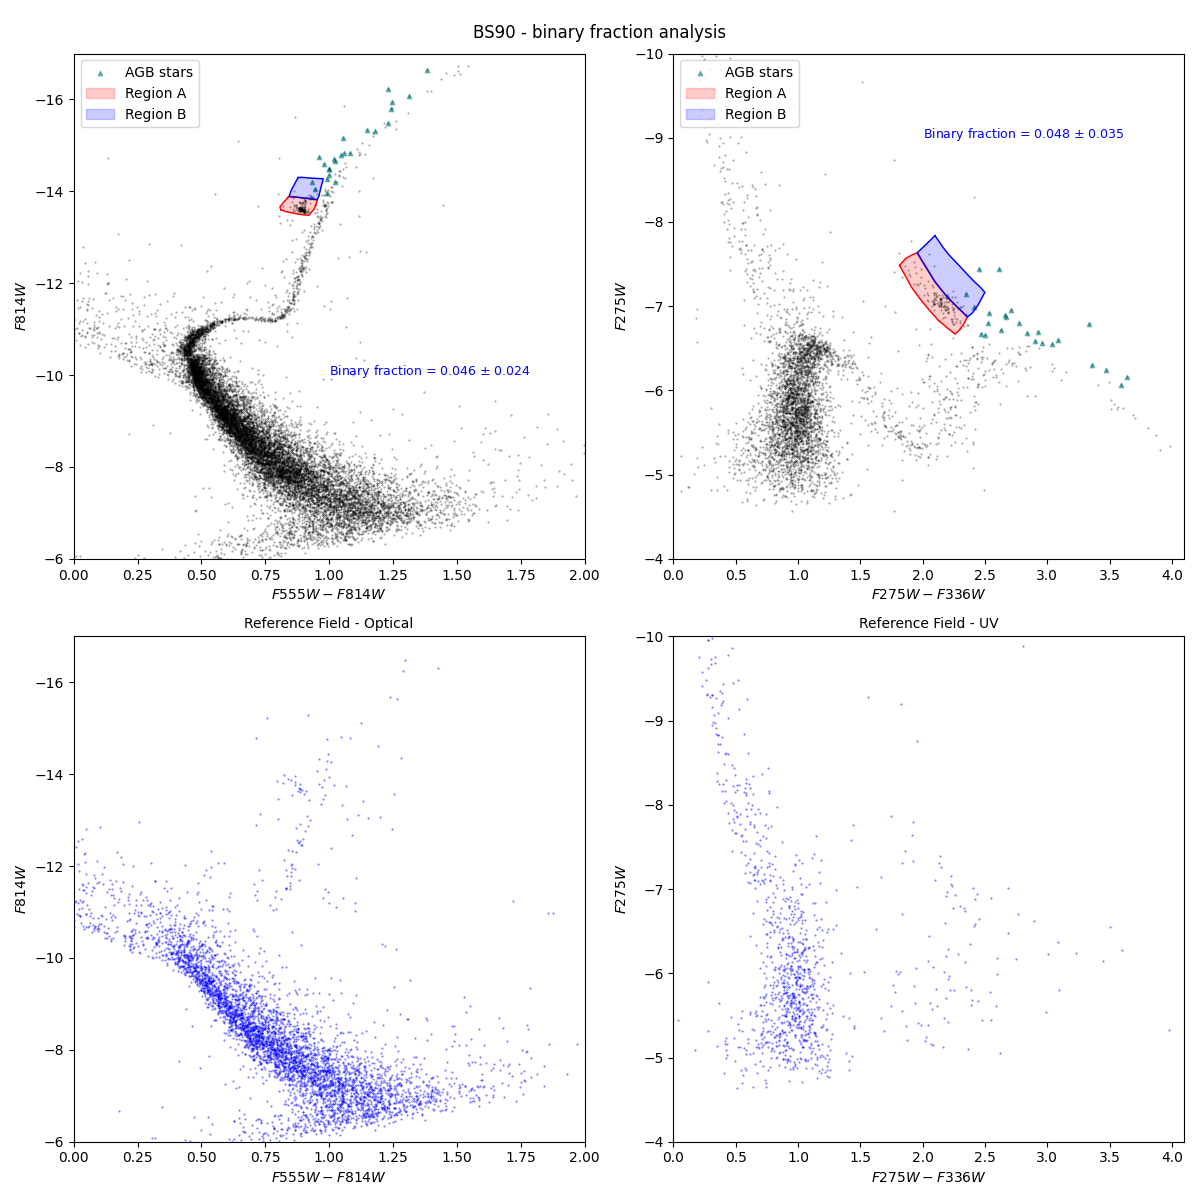

In [35]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# First CMD plot
ax1 = axes[0, 0]
scatter1 = ax1.scatter(data_BS90_cluster['F555W'] - data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.2, c='black', alpha=0.4, zorder=3)
ax1.scatter(agb_stars['F555W'] - agb_stars['F814W'], agb_stars['F814W'], s=10, c='teal', alpha=0.5, zorder=2, marker='^', label='AGB stars')
ax1.invert_yaxis()
ax1.set_xlim(0, 2)
ax1.set_ylim(-6, -17)
ax1.set_xlabel(r'$F555W-F814W$')
ax1.set_ylabel(r'$F814W$')

# Plot regions for first CMD
for region_id, region in region_vis.groupby("Region_ID"):
    closed_region = pd.concat([region, region.iloc[[0]]])
    region_label = region_names.get(region_id, f"Region {region_id}")

    ax1.fill(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), alpha=0.2, label=region_label, zorder=2)
    ax1.plot(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), linewidth=1, zorder=3)

# Add text annotation
ax1.text(1.0, -10, f'Binary fraction = {frac_HB_bin_vis_clean:.3f} $\pm$ {d_frac_HB_bin_vis_clean:.3f}', fontsize=9, color='blue')
ax1.legend(loc='upper left')

# Second CMD plot
ax2 = axes[0, 1]
scatter2 = ax2.scatter(data_BS90_cluster['F275W'] - data_BS90_cluster['F336W'], data_BS90_cluster['F275W'], s=0.2, c='black', alpha=0.4, zorder=3)
ax2.scatter(agb_stars['F275W'] - agb_stars['F336W'], agb_stars['F275W'], s=10, c='teal', alpha=0.5, zorder=2, marker='^', label='AGB stars')
ax2.invert_yaxis()
ax2.set_xlim(0, 4.1)
ax2.set_ylim(-4, -10)
ax2.set_xlabel(r'$F275W-F336W$')
ax2.set_ylabel(r'$F275W$')

# Plot regions for second CMD
for region_id, region in region_uv.groupby("Region_ID"):
    closed_region = pd.concat([region, region.iloc[[0]]])
    region_label = region_names.get(region_id, f"Region {region_id}")

    ax2.fill(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), alpha=0.2, label=region_label, zorder=2)
    ax2.plot(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), linewidth=1, zorder=3)

# Add text annotation
ax2.text(2, -9, f'Binary fraction = {frac_HB_bin_uv_clean:.3f} $\pm$ {d_frac_HB_bin_uv_clean:.3f}', fontsize=9, color='blue')
ax2.legend(loc='upper left')

# optical reference field
ax3 = axes[1, 0]
scatter3 = ax3.scatter(data_reference_field['F555W'] - data_reference_field['F814W'], data_reference_field['F814W'], s=0.2, c='blue', zorder=3, alpha=0.6)
ax3.invert_yaxis()
ax3.set_xlim(0, 2)
ax3.set_ylim(-6, -17)
ax3.set_xlabel(r'$F555W-F814W$')
ax3.set_ylabel(r'$F814W$')
ax3.set_title("Reference Field - Optical", fontsize=10)

# UV reference field
ax4 = axes[1, 1]
scatter4 = ax4.scatter(data_reference_field['F275W'] - data_reference_field['F336W'], data_reference_field['F275W'], s=0.2, c='blue', zorder=3, alpha=0.6)
ax4.invert_yaxis()
ax4.set_xlim(0, 4.1)
ax4.set_ylim(-4, -10)
ax4.set_xlabel(r'$F275W-F336W$')
ax4.set_ylabel(r'$F275W$')
ax4.set_title("Reference Field - UV", fontsize=10)

# Adjust layout
plt.suptitle('BS90 - binary fraction analysis')
plt.tight_layout()
plt.show()


## Quantitative analysis of binaries (RGB)

In [36]:
region_selection_RGB = False

if region_selection_RGB is True:
    cmd_select_RGB = CMDRegionSelector(
        data = data_BS90_cluster,
        color = data_BS90_cluster['F555W'] - data_BS90_cluster['F814W'],
        magnitude = data_BS90_cluster['F814W'],
        x_label='F555W-F814W',
        y_label='F814W',
        output_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv'
    )
    

In [37]:
region_vis_RGB = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv')

region_vis_RGB_A = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], 
    magnitude = data_BS90_cluster['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv')

region_vis_RGB_B = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_BS90_cluster, 
    color = data_BS90_cluster['F555W']-data_BS90_cluster['F814W'], 
    magnitude = data_BS90_cluster['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv')

# compute the error on the binary fraction
error_vis_RGB_A = np.sqrt(len(region_vis_RGB_A) - 1)
error_vis_RGB_B = np.sqrt(len(region_vis_RGB_B) - 1)

print('Region A: ', len(region_vis_RGB_A), '+/-', error_vis_RGB_A)
print('Region B: ', len(region_vis_RGB_B), '+/-', error_vis_RGB_B)

frac_RGB_bin_vis = len(region_vis_RGB_B) / (len(region_vis_RGB_A) + len(region_vis_RGB_B))
err_RGB_bin_vis = (np.sqrt(len(region_vis_RGB_B)**2 * error_vis_RGB_A**2 + len(region_vis_RGB_A)**2 * error_vis_RGB_B**2)) / ((len(region_vis_RGB_A) + len(region_vis_RGB_B))**2)

print('Binary fraction: ', frac_RGB_bin_vis, '+/-', err_RGB_bin_vis)

Region A:  206 +/- 14.317821063276353
Region B:  14 +/- 3.605551275463989
Binary fraction:  0.06363636363636363 +/- 0.015894970657626784


### Clean up from field stars

In [38]:
region_vis_RGB_A_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 0,
    data = data_reference_field, 
    color = data_reference_field['F555W']-data_reference_field['F814W'], 
    magnitude = data_reference_field['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv')

region_vis_RGB_B_field = CMDRegionSelector.get_stars_inside_region(
    region_id = 1,
    data = data_reference_field, 
    color = data_reference_field['F555W']-data_reference_field['F814W'], 
    magnitude = data_reference_field['F814W'], 
    regions_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/regions_RGB_F555W_F814W.csv')

err_visA_RGB_field = np.sqrt(len(region_vis_RGB_A_field) - 1)
err_visB_RGB_field = np.sqrt(len(region_vis_RGB_B_field) - 1)

print('Region A: ', len(region_vis_RGB_A_field), '+/-', err_visA_RGB_field)
print('Region B: ', len(region_vis_RGB_B_field), '+/-', err_visB_RGB_field)

Region A:  33 +/- 5.656854249492381
Region B:  7 +/- 2.449489742783178


In [39]:
frac_RGB_bin_vis_clean = (len(region_vis_RGB_B) - len(region_vis_RGB_B_field)) / (len(region_vis_RGB_A) - len(region_vis_RGB_A_field) + len(region_vis_RGB_B)- len(region_vis_RGB_B_field))
print('Binary fraction (after cleaning from field stars) :', frac_RGB_bin_vis_clean)

Binary fraction (after cleaning from field stars) : 0.03888888888888889


In [40]:
# Define values and their uncertainties
N_A = len(region_vis_RGB_A)  # Number of stars in region A
N_A_field = len(region_vis_RGB_A_field)  # Number of field stars in region A
N_B = len(region_vis_RGB_B)  # Number of stars in region B (excluding AGB)
N_B_field = len(region_vis_RGB_B_field)  # Number of field stars in region B

# Define associated uncertainties (assuming Poisson errors)
dN_A = np.sqrt(N_A-1)
dN_A_field = np.sqrt(N_A_field-1)
dN_B = np.sqrt(N_B-1)
dN_B_field = np.sqrt(N_B_field-1)

# Compute A and B with their uncertainties
A = N_A - N_A_field
dA = np.sqrt(dN_A**2 + dN_A_field**2)  # Error propagation for A

B = N_B - N_B_field
dB = np.sqrt(dN_B_noagb**2 + dN_B_field**2)  # Error propagation for B

# Compute the fraction
frac_RGB_bin_vis_clean = B / (A + B)

# Propagate the uncertainty
d_frac_RGB_bin_vis_clean = np.sqrt((B**2 * dA**2 + A**2 * dB**2)) / (A + B)**2

# Print results
print(f"Fraction of binaries in visible: {frac_RGB_bin_vis_clean:.4f} ± {d_frac_RGB_bin_vis_clean:.4f}")

Fraction of binaries in visible: 0.0389 ± 0.0216


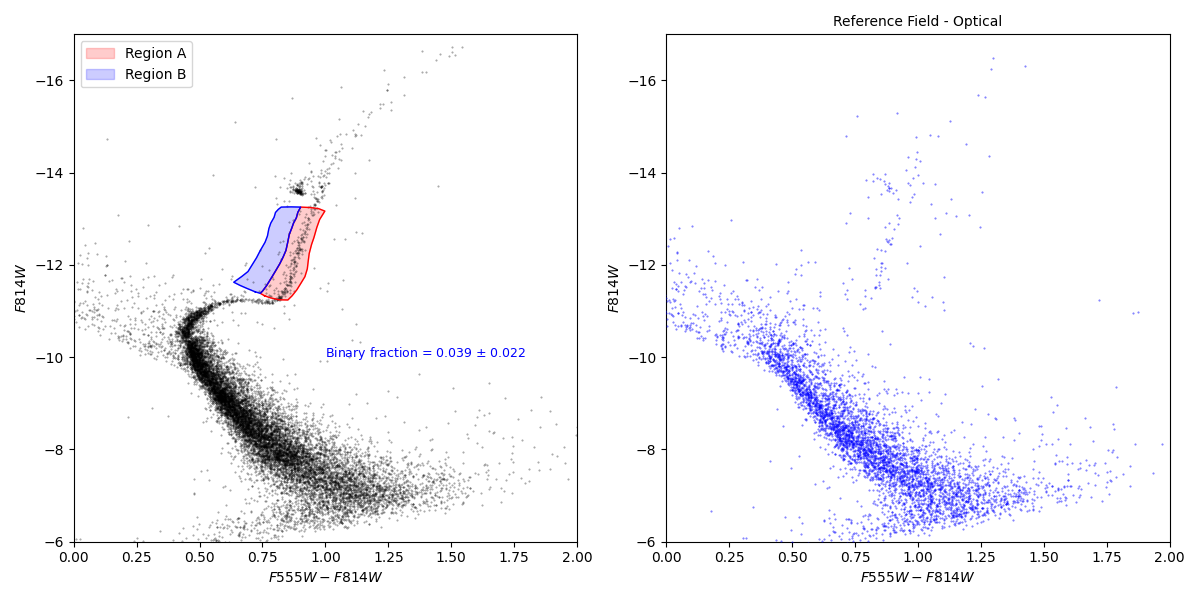

In [41]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 2 rows, 1 columns

# First CMD plot
ax1 = axes[0]
scatter1 = ax1.scatter(data_BS90_cluster['F555W'] - data_BS90_cluster['F814W'], data_BS90_cluster['F814W'], s=0.2, c='black', alpha=0.4, zorder=3)
ax1.invert_yaxis()
ax1.set_xlim(0, 2)
ax1.set_ylim(-6, -17)
ax1.set_xlabel(r'$F555W-F814W$')
ax1.set_ylabel(r'$F814W$')

# Plot regions for first CMD
for region_id, region in region_vis_RGB.groupby("Region_ID"):
    closed_region = pd.concat([region, region.iloc[[0]]])
    region_label = region_names.get(region_id, f"Region {region_id}")

    ax1.fill(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), alpha=0.2, label=region_label, zorder=2)
    ax1.plot(closed_region["X"], closed_region["Y"], color=region_colors.get(region_id, "black"), linewidth=1, zorder=3)

# Add text annotation
ax1.text(1.0, -10, f'Binary fraction = {frac_RGB_bin_vis_clean:.3f} $\pm$ {d_frac_RGB_bin_vis_clean:.3f}', fontsize=9, color='blue')
ax1.legend(loc='upper left')

# optical reference field
ax3 = axes[1]
scatter3 = ax3.scatter(data_reference_field['F555W'] - data_reference_field['F814W'], data_reference_field['F814W'], s=0.2, c='blue', zorder=3, alpha=0.6)
ax3.invert_yaxis()
ax3.set_xlim(0, 2)
ax3.set_ylim(-6, -17)
ax3.set_xlabel(r'$F555W-F814W$')
ax3.set_ylabel(r'$F814W$')
ax3.set_title("Reference Field - Optical", fontsize=10)

plt.tight_layout()
plt.show()

----

## UVdim in BS90

In [42]:
fid_uvdim_line = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fiducial_uvdim_B90.csv')

# Shift the fiducial line in the vertical direction
fid_uvdim_line_shifted = fid_uvdim_line.copy()
fid_uvdim_line_shifted['Y'] = fid_uvdim_line_shifted['Y'] + 0.1

from scipy import interpolate

# Calculate the color for each star
x_stars = data_BS90_cluster['F336W'] - data_BS90_cluster['F814W']  # F336W - F814W for x-axis
y_stars = data_BS90_cluster['F225W'] - data_BS90_cluster['F336W']  # F225W - F336W for y-axis

# Create an interpolation function for the fiducial line (based on F336W - F814W for x-axis and F225W - F336W for y-axis)
interp_func = interpolate.interp1d(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], bounds_error=False, fill_value=np.nan)

# Get the interpolated fiducial Y values for each star's x-coordinate
y_fiducial_interpolated = interp_func(x_stars)

# Now, select stars above the fiducial line
uv_dim_candidate = data_BS90_cluster[
    (y_stars > y_fiducial_interpolated) &  # Stars above the shifted fiducial line
    (x_stars < 1.3)  # Optional condition, adjust as necessary
]

print('UV-dim candidates:', len(uv_dim_candidate))

# Select stars above the fiducial line belonging to the reference field
uv_dim_contamination = data_reference_field[
    (data_reference_field['F225W'] - data_reference_field['F336W'] > interp_func(data_reference_field['F336W'] - data_reference_field['F814W'])) &  # Stars above the shifted fiducial line
    (data_reference_field['F336W'] - data_reference_field['F814W'] < 1.3)  # Optional condition, adjust as necessary
]

if uv_dim_contamination.empty:
    print("No contamination detected in the UV-dim region.")
else:
    print('Contaminants:', len(uv_dim_contamination))

UV-dim candidates: 1
No contamination detected in the UV-dim region.


<div class = 'alert alert-block alert-warning'>
Since there is only one possible UV-dim candidate we can't conclude anything. We can just present the plot saying that with these data we can't say if this cluster has UV-dims, that is what we expect looking at the age of the cluster. Moreover the UV-dim is quite far on the right, it can be just a mistake in the region of the UV-dims. 
</div>

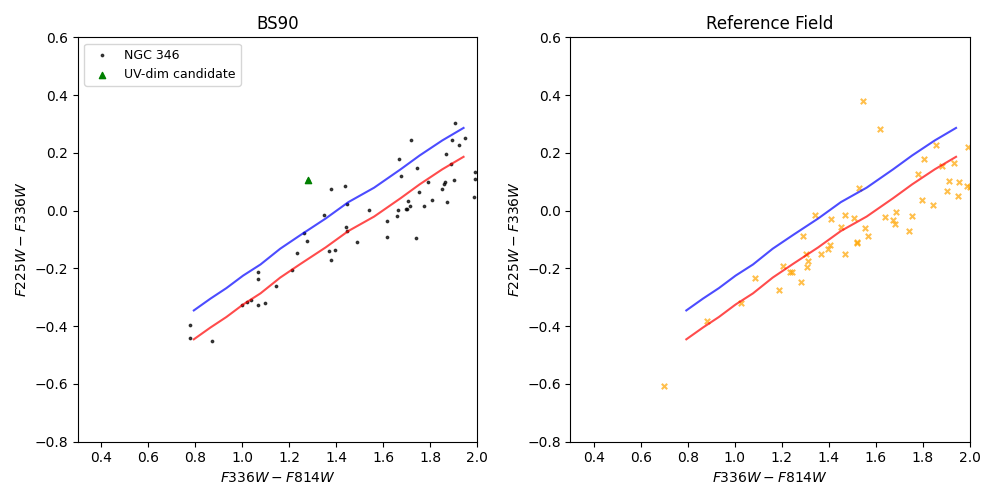

In [43]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_BS90_cluster['F336W']-data_BS90_cluster['F814W'], data_BS90_cluster['F225W']-data_BS90_cluster['F336W'], s=3, alpha=0.7, c='black', label='NGC 346')
plt.scatter(uv_dim_candidate['F336W']-uv_dim_candidate['F814W'], uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], s=20, color='green', marker='^', label='UV-dim candidate')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend(fontsize=9, loc='upper left')
plt.title('BS90')

plt.subplot(1,2,2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.7, marker='x', c='orange', label=r'Reference Field')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.title('Reference Field')

plt.tight_layout()
plt.show()

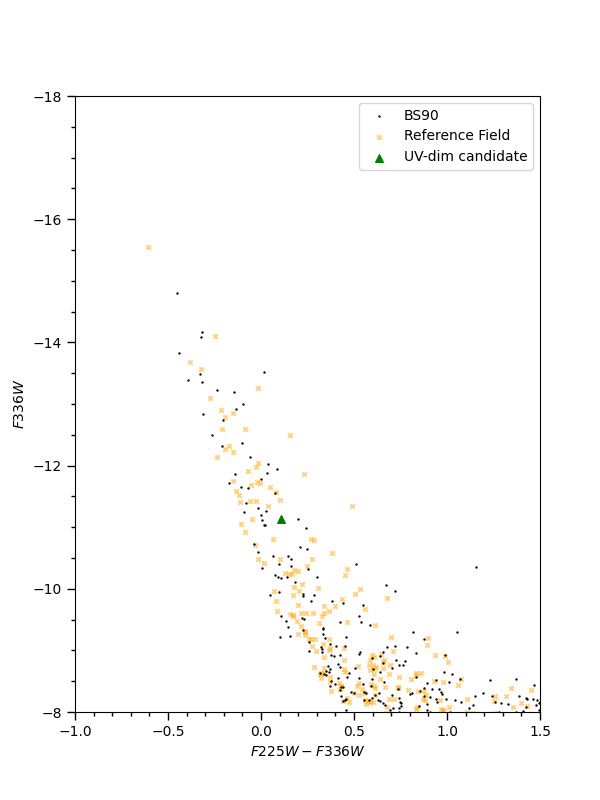

In [44]:
# UV-dim detection 
fig, ax = plt.subplots(figsize=(6, 8))
plt.scatter(data_BS90_cluster['F225W']-data_BS90_cluster['F336W'], data_BS90_cluster['F336W'], s=0.5, c='black', label=r'BS90', zorder=2)
plt.scatter(data_reference_field['F225W']-data_reference_field['F336W'], data_reference_field['F336W'], s=10, alpha = 0.5, c='orange', marker='x', label=r'Reference Field', zorder=1)
plt.scatter(uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], uv_dim_candidate['F336W'], s=30, c='green', marker='^', label='UV-dim candidate', zorder=3)

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-1,1.5)
plt.ylim(-8,-18)
plt.xlabel(r'$F225W-F336W$')
plt.ylabel(r'$F336W$')
plt.legend()
plt.show()